Market Mix Modeling (MMM) is a technique used to analyze the impact of various marketing channels on sales.

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats.mstats import winsorize

### Data Preprocessing

In [26]:
data = pd.read_csv('C:/Users/DELL/personal_projects/linReg_MMM/data/Sample Media Spend Data.csv')


In [27]:
data

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,1/13/2018,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,1/20/2018,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,1/27/2018,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2/3/2018,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


In [34]:
data['Calendar_Week'] = pd.to_datetime(data['Calendar_Week'], format ='%m/%d/%Y')

In [37]:
#check null
data.isnull().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

oh it is a clean dataset

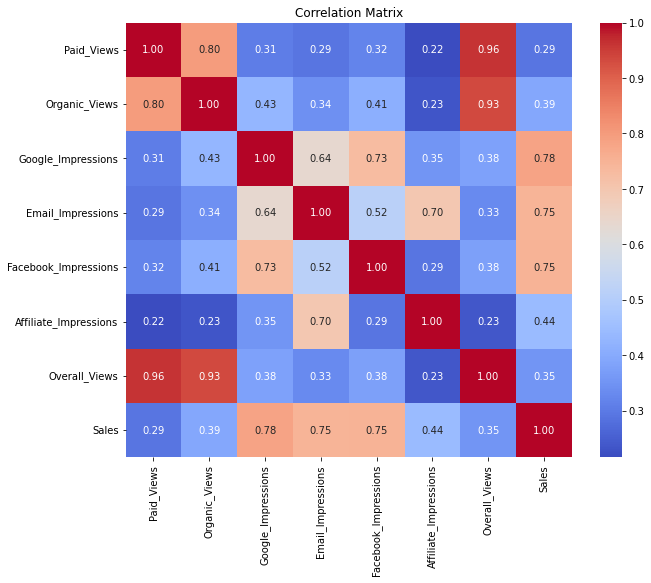

In [38]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


From this corr matrix we can note: 
* paid and  organic views are correlated and have a strong effect on the overall views which is logic.
* Google impression are correlatd with facebook and email impression which may suggest that people who get the add on facebook goes and search about it in google, or that the ads in facebok have links that takes uto a google website.
* emails are correlates with the affiliate impressions
* google, email and facebook has an influence on the sales.
* However Youtube has no significant effect on sales :/

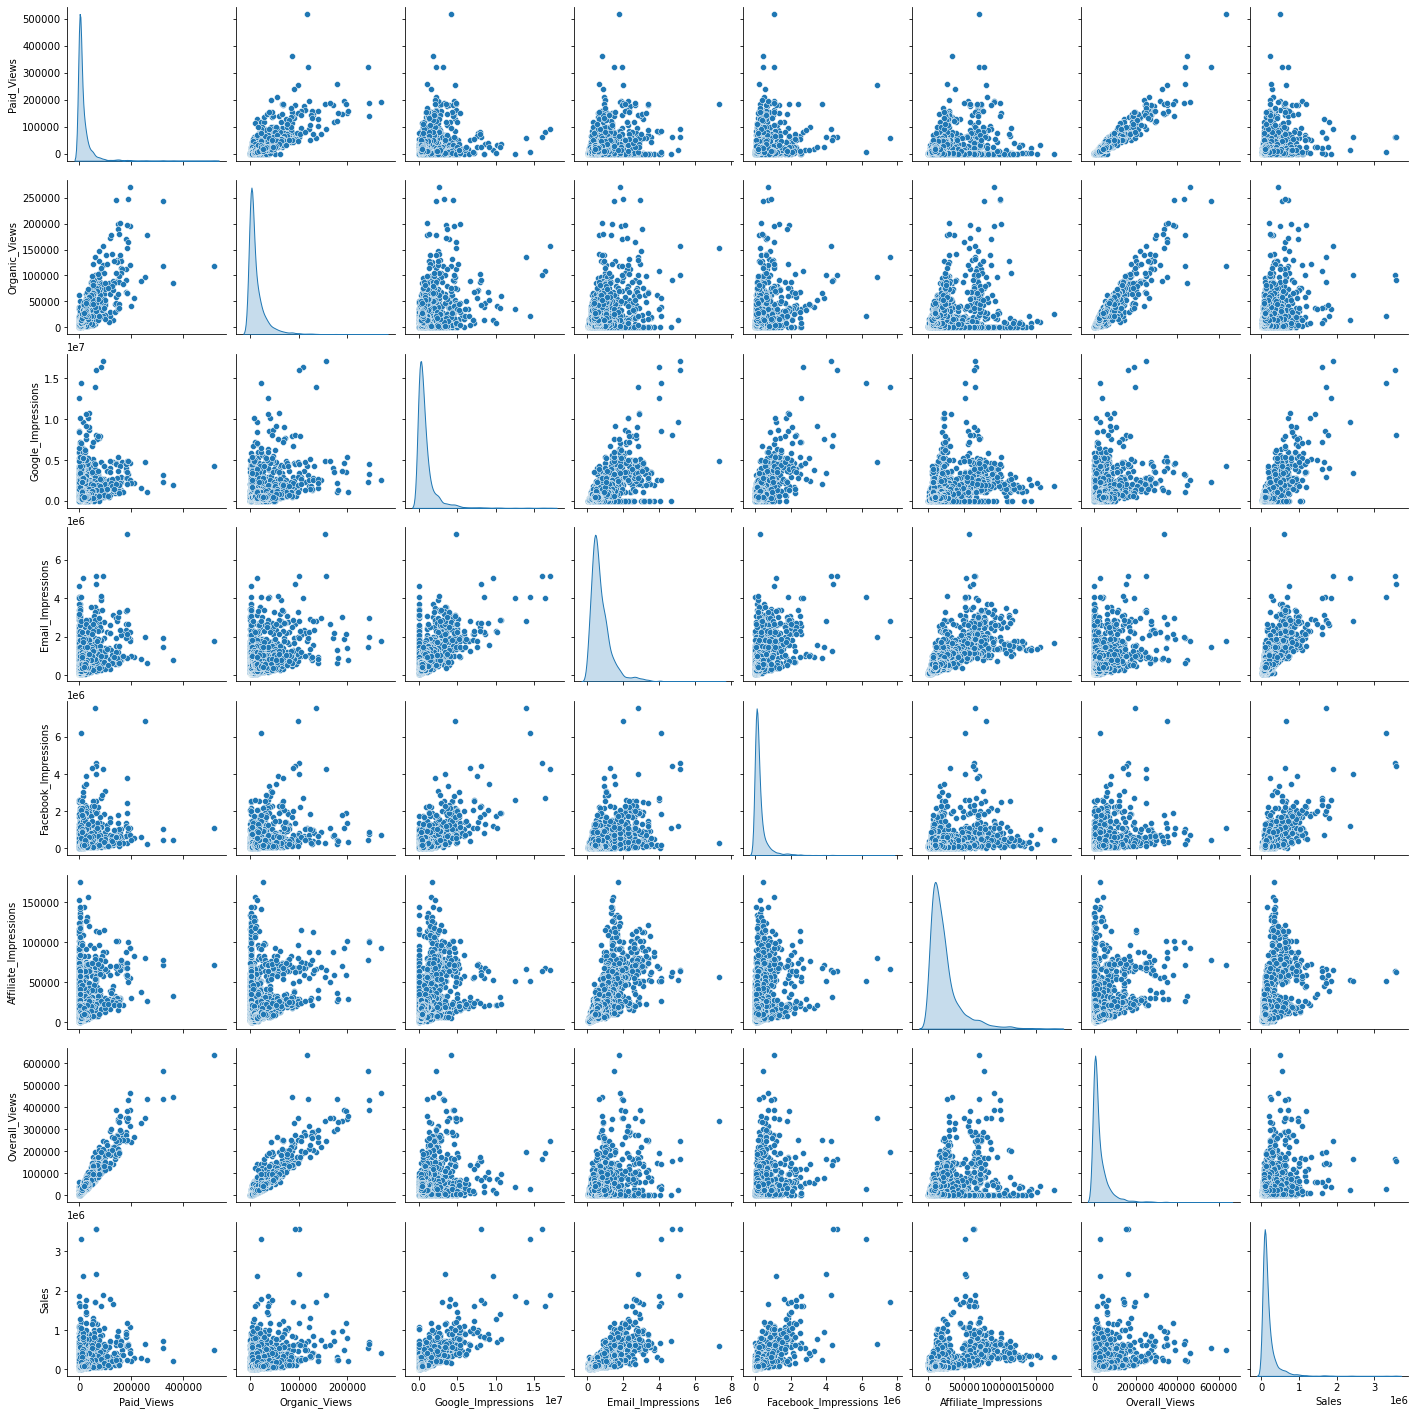

In [40]:
# Select the columns you want to include in the pair plot
columns_to_include = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Sales']

# Create a pair plot
sns.pairplot(data[columns_to_include], diag_kind='kde')  # 'diag_kind' specifies the type of diagonal plot (kernel density estimate)
plt.show()


In [87]:
#(we can notice that our data has a lot of outliners)

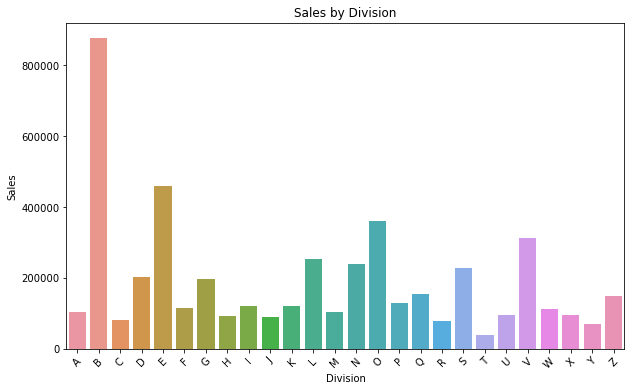

In [45]:
# Create a bar plot of Division vs. Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Division', y='Sales', data=data, ci=None)  # ci=None to suppress confidence intervals
plt.title('Sales by Division')
plt.xlabel('Division')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [46]:
#devision B has the most sales

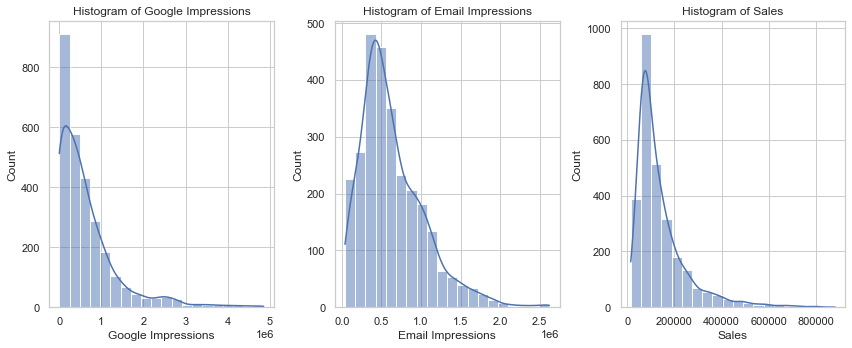

In [155]:
sns.set(style="whitegrid")
# Create subplots for histograms
plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.histplot(data['Google_Impressions'], bins=20, kde=True)
plt.xlabel('Google Impressions')
plt.title('Histogram of Google Impressions')

plt.subplot(132)
sns.histplot(data['Email_Impressions'], bins=20, kde=True)
plt.xlabel('Email Impressions')
plt.title('Histogram of Email Impressions')

plt.subplot(133)
sns.histplot(data['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.title('Histogram of Sales')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Outliners

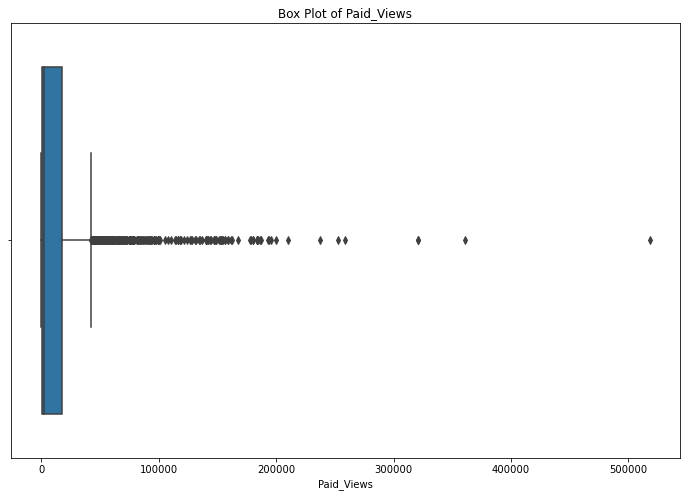

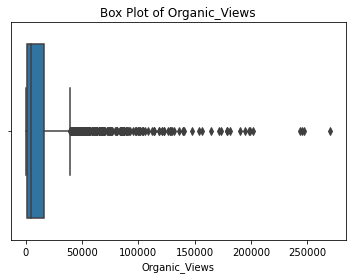

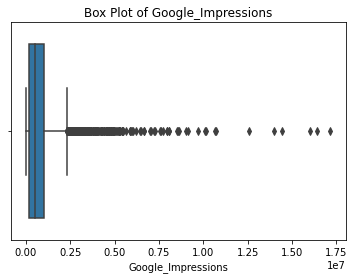

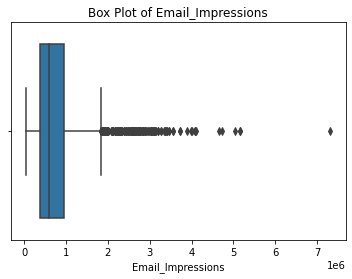

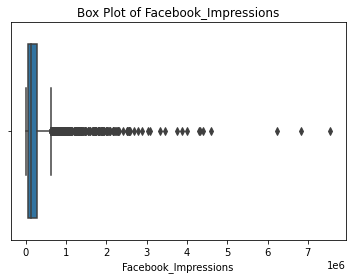

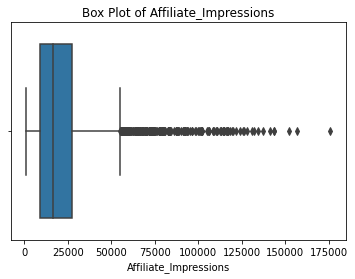

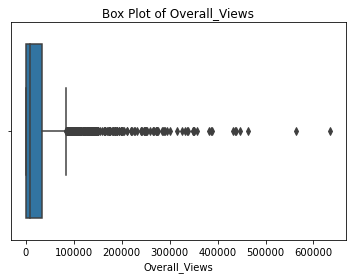

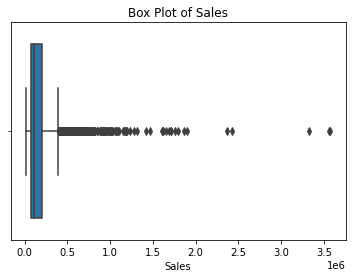

In [84]:
# Create box plots for multiple numeric variables
numeric_columns = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views','Sales']

plt.figure(figsize=(12, 8))  # Set the figure size (optional)

# Loop through each numeric column and create a box plot
for col in numeric_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

We notice that we have outliners.

In [110]:
# List of variables to winsorize
variables= ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Sales']

z_scores = pd.DataFrame()
for variable in variables:
    z_score = (data[variable] - data[variable].mean()) / data[variable].std()
    z_scores[variable] = z_score
data = data[(z_scores.abs() <= 3).all(axis=1)]

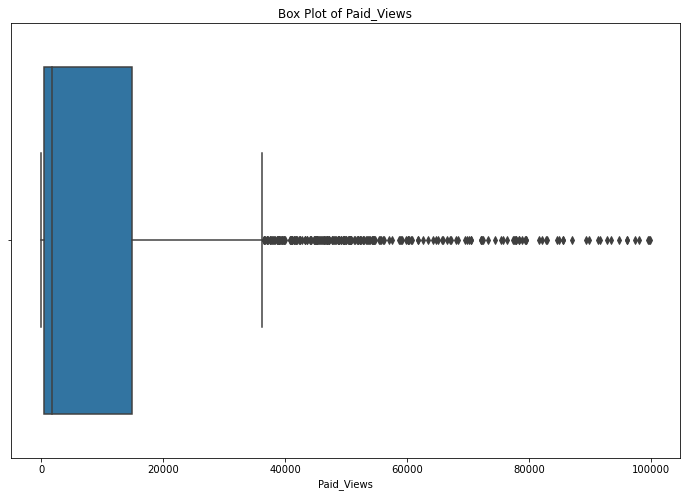

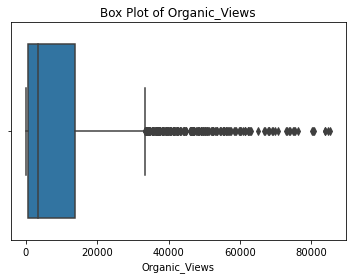

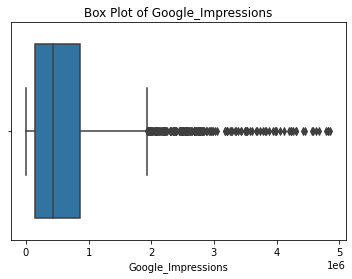

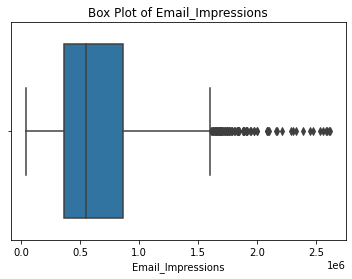

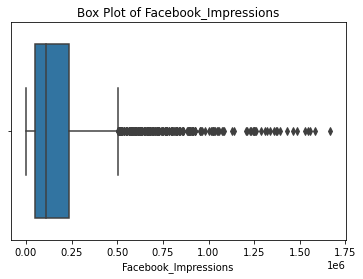

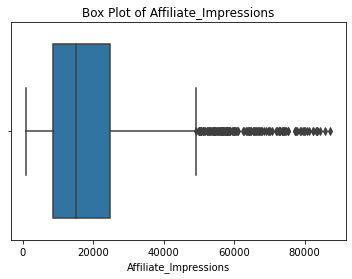

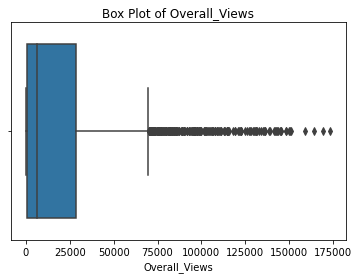

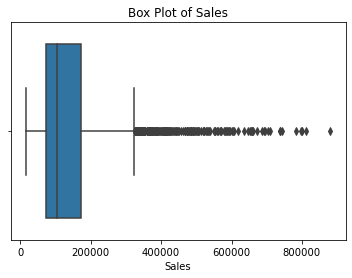

In [112]:
numeric_columns = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views','Sales']

plt.figure(figsize=(12, 8))  # Set the figure size (optional)

# Loop through each numeric column and create a box plot
for col in numeric_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

### Feature Engineering

In [113]:
# Extract week, month, and year
data['Week'] = data['Calendar_Week'].dt.week
data['Month'] = data['Calendar_Week'].dt.month
data['Year'] = data['Calendar_Week'].dt.year

C:\Users\DELL\AppData\Local\Temp\ipykernel_18424\3861864001.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Calendar_Week'].dt.week
C:\Users\DELL\AppData\Local\Temp\ipykernel_18424\3861864001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Week'] = data['Calendar_Week'].dt.week
C:\Users\DELL\AppData\Local\Temp\ipykernel_18424\3861864001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [114]:
data['Day'] = data['Calendar_Week'].dt.day

C:\Users\DELL\AppData\Local\Temp\ipykernel_18424\3144410924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Calendar_Week'].dt.day


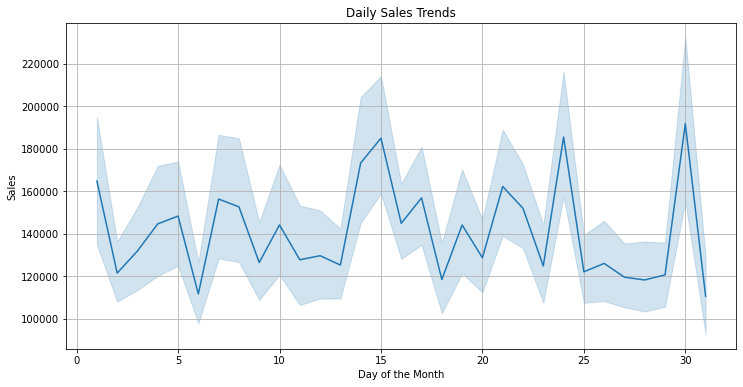

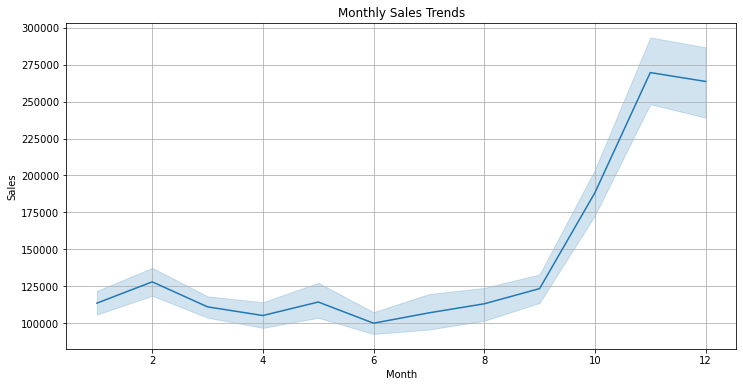

In [115]:
# Create a line plot for daily sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Sales', data=data)
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Create a line plot for monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=data)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


we notic that in the end of the month and in the end of the year sales augmente and that due to the fact that most people get their paycheck at the end of each month and that the year end is full of festivals so it infuence the customers consumation 

###  Data Splitting

I am not sure if the division represents a state of the USA or other thing so i will train my models with and without this variable and see if it has an impact on our overrall result.

In [116]:
#Division is categorical variable so let modify it using one hot encoding
data_with_dummies = pd.get_dummies(data, columns=['Division'], drop_first=False)

In [117]:
data_with_dummies.columns

Index(['Calendar_Week', 'Paid_Views', 'Organic_Views', 'Google_Impressions',
       'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions',
       'Overall_Views', 'Sales', 'Week', 'Month', 'Year', 'Day',
       'Paid_Views_log', 'Organic_Views_log', 'Google_Impressions_log',
       'Email_Impressions_log', 'Facebook_Impressions_log',
       'Affiliate_Impressions_log', 'Overall_Views_log', 'Sales_log',
       'Paid_Views_winsorized', 'Organic_Views_winsorized',
       'Google_Impressions_winsorized', 'Email_Impressions_winsorized',
       'Facebook_Impressions_winsorized', 'Affiliate_Impressions_winsorized',
       'Overall_Views_winsorized', 'Sales_winsorized', 'Division_A',
       'Division_B', 'Division_C', 'Division_D', 'Division_E', 'Division_F',
       'Division_G', 'Division_H', 'Division_I', 'Division_J', 'Division_K',
       'Division_L', 'Division_M', 'Division_N', 'Division_O', 'Division_P',
       'Division_Q', 'Division_R', 'Division_S', 'Division_T', 'Divis

In [118]:
# Define independent variables (X) and the dependent variable (y)
X = data[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = data['Sales']

In [119]:
# Model with Division as a predictor
X_with_division = data_with_dummies[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views', 'Division_A',
       'Division_B', 'Division_C', 'Division_D', 'Division_E', 'Division_F',
       'Division_G', 'Division_H', 'Division_I', 'Division_J', 'Division_K',
       'Division_L', 'Division_M', 'Division_N', 'Division_O', 'Division_P',
       'Division_Q', 'Division_R', 'Division_S', 'Division_T', 'Division_U',
       'Division_V', 'Division_W', 'Division_X', 'Division_Y', 'Division_Z']]
X_with_division = sm.add_constant(X_with_division)
Y_with_division = data_with_dummies['Sales']

In [120]:
from sklearn.model_selection import train_test_split

# Split your existing data into training and testing sets
X_traind, X_testd, y_traind, y_testd = train_test_split(X_with_division, Y_with_division, test_size=0.2, random_state=42)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model training

###  1/ Linear Regression

#### With and Without Division

I did some research and I found that for "statistical analysis, Statsmodels may be a better choice compared to Scikit-learn " However both are extremely powerful and because we are dealing with an MMM problem I chose Statsmodels.

In [122]:
model_without_division = sm.OLS(y_train, X_train).fit()

In [123]:
model_with_division = sm.OLS(y_traind, X_traind).fit()

##### Evaluate R squared

In [124]:
# R-squared for the model with Division
r_squared_with_division = model_with_division.rsquared

# R-squared for the model without Division
r_squared_without_division = model_without_division.rsquared

print("R-squared with Division:", r_squared_with_division)
print("R-squared without Division:", r_squared_without_division)


R-squared with Division: 0.7569466797318631
R-squared without Division: 0.6812181504538932


rsquared with division is higher which indicate a better fit!

So i will Choose the model with division.

In [125]:
# Assuming you have a model named 'model_with_division'
y_pred_test = model_with_division.predict(X_testd)


In [126]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_testd, y_pred_test)
mse = mean_squared_error(y_testd, y_pred_test)
rmse = np.sqrt(mse)
r_squared = r2_score(y_testd, y_pred_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Absolute Error: 35464.10980090782
Mean Squared Error: 3039234757.1882753
Root Mean Squared Error: 55129.255003022445
R-squared: 0.7163965938607122


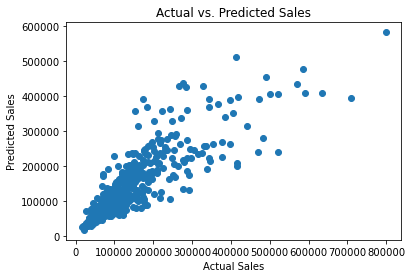

In [127]:
# Create a scatter plot of predicted vs. actual values
plt.scatter(y_testd, y_pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


Even after dealing with outliners our model didnt get the best scores :/ after i rechecked our data i noticed that the relation tw sales and the input variables is actually non linear, so i will train another model, this time random forest as it is a model tat showed good results in MMM

### 2/ Random Forest

In [129]:
#Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Fit the model to the training data
rf_model.fit(X_traind, y_traind)


RandomForestRegressor(random_state=42)

In [130]:
# Make predictions on the testing data
rf_predictions = rf_model.predict(X_testd)

# Calculate performance metrics
rf_mae = mean_absolute_error(y_testd, rf_predictions)
rf_mse = mean_squared_error(y_testd, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_testd, rf_predictions)

print("Random Forest Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")


Random Forest Metrics:
Mean Absolute Error: 28127.84265232975
Mean Squared Error: 1881274105.2984939
Root Mean Squared Error: 43373.656812614885
R-squared: 0.8244506309088507


In [133]:
feature_importances = rf_model.feature_importances_

feature_names = X_with_division.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N features (e.g., top 10)
top_n = 10
print(f"Top {top_n} Features:")
print(feature_importance_df.head(top_n))


Top 10 Features:
                  Feature  Importance
3      Google_Impressions    0.395946
4       Email_Impressions    0.215905
5    Facebook_Impressions    0.203934
6   Affiliate_Impressions    0.062879
2           Organic_Views    0.029312
1              Paid_Views    0.027690
7           Overall_Views    0.019128
12             Division_E    0.011969
21             Division_N    0.007352
27             Division_T    0.004134


#### Hypertuning our model


In [138]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    # Add more hyperparameters as needed
}


In [141]:
#cross validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [142]:
grid_search.fit(X_traind, y_traind)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [145]:
best_params = grid_search.best_params_


In [146]:
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_traind, y_traind)


RandomForestRegressor(max_depth=20, n_estimators=500, random_state=42)

In [147]:
y_pred = best_rf_model.predict(X_testd)
mse = mean_squared_error(y_testd, y_pred)
mae = mean_absolute_error(y_testd, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_testd, y_pred)

In [148]:
print("Random Forest Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Random Forest Metrics:
Mean Absolute Error: 28036.992689616545
Mean Squared Error: 1834817426.0821319
Root Mean Squared Error: 42834.76889259626
R-squared: 0.8287856933559088


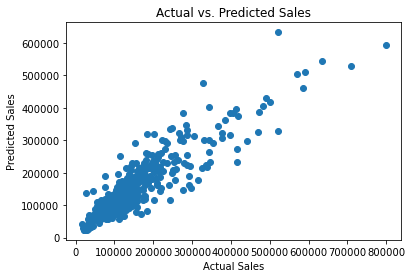

In [149]:
# Create a scatter plot of predicted vs. actual values
plt.scatter(y_testd, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

In [150]:
#way better

In [151]:
feature_importances = best_rf_model.feature_importances_

feature_names = X_with_division.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N features (e.g., top 10)
top_n = 10
print(f"Top {top_n} Features:")
print(feature_importance_df.head(top_n))


Top 10 Features:
                  Feature  Importance
3      Google_Impressions    0.387659
4       Email_Impressions    0.220855
5    Facebook_Impressions    0.207483
6   Affiliate_Impressions    0.063841
2           Organic_Views    0.028612
1              Paid_Views    0.027615
7           Overall_Views    0.018792
12             Division_E    0.012234
21             Division_N    0.007285
27             Division_T    0.004108


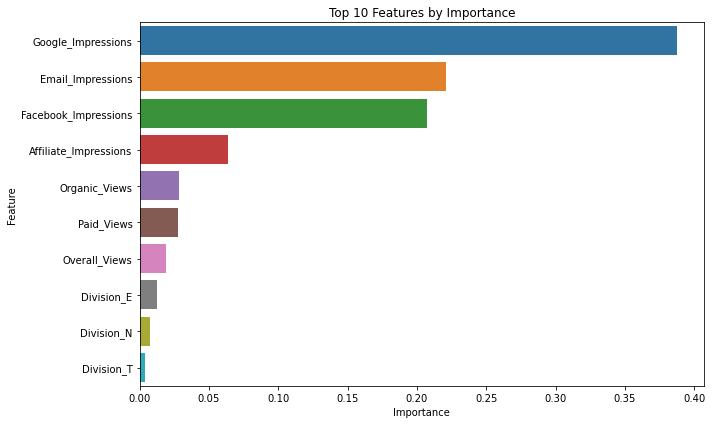

In [152]:
#let visualize it 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**1. Summerize :**

In this analysis, I aimed to develop a market mix model (MMM) to optimize advertising spend and predict sales for a consumer goods company. My objectives were to improve the accuracy of sales predictions and identify the key drivers influencing sales.

I began by preprocessing the data, which involved cleaning, handling missing values, and addressing outliers. Feature engineering was also performed, including the extraction of temporal features from the calendar week. I used one-hot encoding to transform the categorical variable "Division" into a format suitable for modeling.

To build the predictive model, I initially employed a linear regression model. However, after evaluating its performance, I decided to explore Random Forest regression due to its ability to capture non-linear relationships in the data. Hyperparameter tuning led to significant improvements in model performance.



**2. Model Deployment and Conclusions:**

 Insights gained from the model's feature importance analysis provide actionable recommendations:

- **Google Impressions** have the highest importance, suggesting that increasing the company's online presence through Google advertising could have a substantial impact on sales.

- **Email Impressions** and **Facebook Impressions** are also significant contributors.

- **Affiliate Impressions** play a role in influencing sales, albeit to a lesser extent.

- **Organic Views** and **Paid Views** both contribute positively to sales, emphasizing the importance of both organic and paid views of Youtube.

If It was a real-life scenario, I would strongly recommend increasing investment in Google ads, but even more crucially, in email and Facebook advertising. This recommendation is substantiated by the robust correlations we observed between Google, email, and Facebook ad impressions. These correlations may signify that potential customers, having been exposed to ads on Facebook and through email, subsequently turn to Google for further information or engagement.



**3. Limitations:**

While My analysis has yielded promising results, several limitations should be acknowledged:
- The dataset is limited, and it may not capture long-term trends or seasonality effectively.
- The model's predictive accuracy still can be improved.

**4. References:**

- Kaggle Dataset: [Sample Media Spends Data](https://www.kaggle.com/datasets/yugagrawal95/sample-media-spends-data)

**5. Final Thoughts:**

- The Random Forest model, with its feature importance analysis, offers a practical tool for guiding marketing strategies. 
- I welcome any feedback or suggestions for further improvement.

Author: Nadia KACEM